In [1]:

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


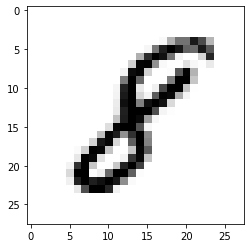

In [2]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [93]:
import numpy as np
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
input_shape = (32, 32, 1)

In [5]:
#WERSJA 2

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [49]:
#WERSJA 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),   
    tf.keras.layers.Dense(10, activation="softmax")
]);

In [72]:
#WERSJA 3

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(6, kernel_size=(5,5), input_shape=input_shape),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), input_shape=input_shape),
    tf.keras.layers.AveragePooling2D(2,2),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(140, activation="relu"),  
    tf.keras.layers.Dense(84, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
     
]);

In [83]:
#WERSJA 4

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation="relu"),  
    tf.keras.layers.Dense(84, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
     
]);

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)),
tf.keras.layers.AveragePooling2D(),

tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
tf.keras.layers.AveragePooling2D(),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(units=120, activation='relu'),

tf.keras.layers.Dense(units=84, activation='relu'),

tf.keras.layers.Dense(units=10, activation = 'softmax')
]);

In [100]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_30 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_52 (Dense)             (None, 84)              

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6300)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               806528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 808,098
Trainable params: 808,098
Non-trainable params: 0
________________________________________________

In [9]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 1

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [101]:
#WERSJA 2
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
#WERSJA 1
#nie dziala
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [102]:
#WERSJA 1
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10, validation_data=(x_test, y_test), verbose=1, 
                                  callbacks = [callbacks], workers=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\functional.py:421 call
        inputs, training=training, mask=mask)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\hanna\.virtualenvs\FruitRecognition-0gOXzYKb\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_51 is incompatible with the layer: expected axis -1 of input shape to have value 400 but received input with shape (32, 784)


In [21]:
#WERSJA 2
# bez val accuracy wiec nie bedzie tego na wykresie
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0708 - accuracy: 0.9773
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0656 - accuracy: 0.9789
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0634 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0605 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0555 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0525 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0499 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0493 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0628 - accuracy: 0.9822


[0.06276677548885345, 0.982200026512146]

9


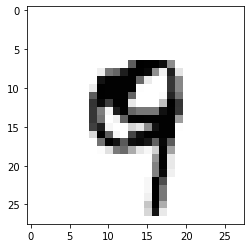

In [31]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [32]:
filepath = r"model2"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("model2.h5")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [33]:
# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('model2.h5')
tflite_model = converter.convert()

# Save the model.
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\assets


INFO:tensorflow:Assets written to: C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\assets


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\variables\variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_1_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_1_input


INFO:tensorflow: tensor name: serving_default_conv2d_1_input:0, shape: (-1, 28, 28, 1), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_conv2d_1_input:0, shape: (-1, 28, 28, 1), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_3


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\hanna\AppData\Local\Temp\tmpr3cdi7ts\variables\variables


In [34]:

  with open("historia2.txt",'w') as f:
    for k in my_model.history.keys():
        print(k,file=f)
        for i in my_model.history[k]:
            print(i,file=f)

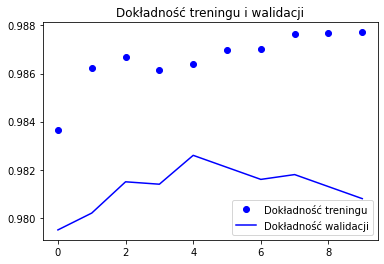

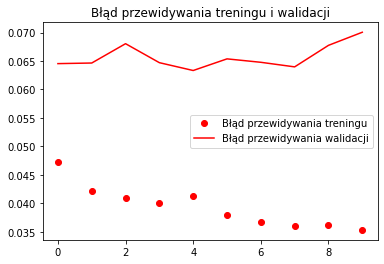

In [35]:
acc = my_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = my_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = my_model.history['loss'] #training loss scores from the model that has been trained
val_loss = my_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Dokładność treningu')
plt.plot(epochs, val_acc, 'b', label = 'Dokładność walidacji')
plt.title('Dokładność treningu i walidacji')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Błąd przewidywania treningu')
plt.plot(epochs, val_loss, 'r', label = 'Błąd przewidywania walidacji')
plt.title('Błąd przewidywania treningu i walidacji')

plt.legend()

plt.show()